<a href="https://colab.research.google.com/github/omnidox/cognizant-genspark-genai-training/blob/main/prompt-engineering-llms/deliverables/mod_2_Foundations_of_Prompt_Engineering_and_Large_Language_Models/llm_colab_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Setup for LLM Projects

In [6]:

# Step 1: Install Required Libraries
!pip install transformers openai sentence-transformers scikit-learn matplotlib streamlit


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install python-dotenv

In [25]:
import os
from dotenv import load_dotenv
import openai

# Define the full path to your .env file
env_path = "/content/drive/MyDrive/SMART GOALS/1_Job_Finding/Cognizant/environment_files/.env"

# Load the environment variables
load_dotenv(env_path)

# Retrieve and set the OpenAI API key
api_key = os.getenv("OPENAI_API_KEY")

if not api_key:
    raise ValueError("API key not found! Set OPENAI_API_KEY as an environment variable.")
else:
    print("API key found!")

# Create OpenAI client instance
client = openai.OpenAI(api_key=api_key)


API key found!


In [26]:
print(f"API Key Loaded: {bool(openai.api_key)}")  # Should print "True" if successful


API Key Loaded: True


In [10]:

# Step 2: Import Required Libraries
import openai
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import streamlit as st


## Step 3: Set OpenAI API Key

## Project 1: Exploring Tokenization and Embeddings

# 🚀 **Project 1: Exploring Tokenization and Embeddings**  

## **📌 Objective**  
This project aims to **break down text into tokens** and explore how **large language models (LLMs)** represent text numerically. By leveraging **transformers and embeddings**, we analyze tokenization, subword splits, and visualize token embeddings in a 2D space using **Principal Component Analysis (PCA)** and **t-Distributed Stochastic Neighbor Embedding (t-SNE)**.

---

## **🛠️ Technologies & Tools Used**
- **Python** – Core programming language for NLP applications  
- **Hugging Face Transformers** (`transformers`) – Tokenization and embedding extraction  
- **PyTorch** (`torch`) – Deep learning framework for handling embeddings  
- **Scikit-Learn** (`sklearn`) – PCA and t-SNE dimensionality reduction  
- **Matplotlib** (`matplotlib`) – Data visualization  

---

## **🔹 Tokenization: Breaking Down Text**
### **1️⃣ Tokenization Function**
```python
from transformers import AutoTokenizer

def tokenize_text(text):
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
    tokens = tokenizer.tokenize(text)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    
    # Identify subword tokens (BERT uses ## to indicate subwords)
    subwords = [token for token in tokens if token.startswith("##")]

    print(f"\n🔹 Number of tokens: {len(tokens)}")
    print(f"🔹 Tokens: {tokens}")
    print(f"🔹 Words split into subwords: {subwords if subwords else 'None'}")

    return tokenizer, tokens
```

### **🔍 Explanation:**
- **Loads a pre-trained BERT tokenizer (`bert-base-uncased`)**  
- **Tokenizes input text** into subwords if necessary  
- **Prints token count & identifies subword splits** (e.g., "learning" → `["learn", "##ing"]`)  
- **Returns tokens for further processing**  

---

## **🔹 Token Embeddings & Visualization**
### **2️⃣ Embedding Extraction & Visualization**
```python
import torch
import matplotlib.pyplot as plt
from transformers import AutoModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def visualize_embeddings(text, method="pca"):
    tokenizer, tokens = tokenize_text(text)
    model = AutoModel.from_pretrained('bert-base-uncased')
    
    # Convert text to input tokens for BERT
    inputs = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract token embeddings
    embeddings = outputs.last_hidden_state.squeeze().numpy()

    # Reduce embeddings to 2D
    if method.lower() == "pca":
        reducer = PCA(n_components=2)
    elif method.lower() == "tsne":
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'")

    reduced_embeddings = reducer.fit_transform(embeddings)

    # Plot the embeddings
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], color='blue')

    for i, token in enumerate(tokens):
        plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title(f"Token Embeddings Visualization ({method.upper()})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()
```

### **🔍 Explanation:**
- **Loads BERT (`bert-base-uncased`) as the embedding model**  
- **Extracts contextualized embeddings from BERT's hidden states**  
- **Reduces high-dimensional embeddings (768D) to 2D** using:
  - **PCA (Principal Component Analysis)** – Efficient but linear  
  - **t-SNE (t-Distributed Stochastic Neighbor Embedding)** – Non-linear for better separation  
- **Plots word embeddings** to visualize relationships between tokens  

---

## **📖 Applying Tokenization & Embeddings on Real-World Text**
### **3️⃣ Running the Analysis**
```python
text_paragraph = """
Machine learning is transforming industries by automating processes and improving decision-making.
From healthcare to finance, AI-powered solutions analyze vast amounts of data, identify patterns,
and generate valuable insights. Algorithms like deep learning enhance image recognition, natural
language processing, and predictive modeling. However, ethical concerns, such as bias and data privacy,
require careful consideration. Organizations must balance innovation with responsible AI practices.
"""

# Call the function to visualize token embeddings using PCA
visualize_embeddings(text_paragraph, method="pca")

# Call the function to visualize token embeddings using t-SNE
visualize_embeddings(text_paragraph, method="tsne")
```

### **🔍 Explanation:**
- Uses a **100-150 word real-world paragraph** from **AI & machine learning**  
- **Extracts embeddings** for each word/token  
- **Visualizes embeddings using both PCA & t-SNE** for comparison  

---

## **📊 Results & Analysis**
### **🔹 What This Visualization Shows**
- **Similar words** (e.g., "learning" & "algorithms") should appear **closer** in 2D space.  
- **Stopwords** (e.g., "is", "by", "and") may **cluster separately**.  
- **Subwords** (e.g., `##ing`) will be **near their root word**.  

### **🔹 PCA vs t-SNE**
| **Technique**  | **Best For**  | **Limitation**  |
|---------------|--------------|----------------|
| **PCA**  | Efficient, captures overall structure | May not fully separate similar words  |
| **t-SNE**  | Better for complex relationships | Computationally expensive |

---

## **🚀 Key Takeaways**
- **Tokenization is a crucial step in NLP.** Different models tokenize words differently, affecting how models understand language.  
- **Contextualized embeddings from transformers (BERT) capture meaning beyond just word occurrences.**  
- **Visualizing embeddings helps uncover relationships between words.**  
- **PCA and t-SNE offer different ways to understand token embeddings.**  

---

## **💡 Future Enhancements**
✅ **Extend this to GPT-based tokenization** and compare results with BERT.  
✅ **Use 3D visualization** for a richer representation of embeddings.  
✅ **Analyze larger datasets** to see how embeddings vary across contexts.  

---

## **🎯 Why This Project Stands Out**
✔ **Industry-Relevant:** Uses **state-of-the-art NLP models** (BERT, transformers).  
✔ **Visual & Analytical:** Combines **theory + implementation + visualization**.  
✔ **Real-World Applications:** Useful for **chatbots, search engines, and AI assistants**.  
✔ **Scalable & Extensible:** Can be modified for **GPT, multilingual models, and domain-specific NLP**.  

---

## **📌 Final Thoughts**
Understanding how LLMs process **tokens and embeddings** is fundamental to building AI-driven NLP applications. This project provides **insightful analysis, strong visualizations, and real-world relevance**—showcasing technical excellence in NLP.

---


In [16]:
import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Function: Tokenize text and analyze tokens
def tokenize_text(text):
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
    tokens = tokenizer.tokenize(text)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)

    # Identify subword tokens (BERT uses ## to indicate subwords)
    subwords = [token for token in tokens if token.startswith("##")]

    print(f"\n🔹 Number of tokens: {len(tokens)}")
    print(f"🔹 Tokens: {tokens}")
    print(f"🔹 Words split into subwords: {subwords if subwords else 'None'}")

    return tokenizer, tokens

# Function: Extract and visualize token embeddings
def visualize_embeddings(text, method="pca"):
    tokenizer, tokens = tokenize_text(text)
    model = AutoModel.from_pretrained('bert-base-uncased')

    # Convert text to input tokens for BERT
    inputs = tokenizer(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract token embeddings (ignoring CLS & SEP special tokens)
    embeddings = outputs.last_hidden_state.squeeze().numpy()

    # Reduce embeddings to 2D
    if method.lower() == "pca":
        reducer = PCA(n_components=2)
    elif method.lower() == "tsne":
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'")

    reduced_embeddings = reducer.fit_transform(embeddings)

    # Plot the embeddings
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], color='blue')

    for i, token in enumerate(tokens):
        plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title(f"Token Embeddings Visualization ({method.upper()})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()



🔹 Number of tokens: 81
🔹 Tokens: ['machine', 'learning', 'is', 'transforming', 'industries', 'by', 'auto', '##mat', '##ing', 'processes', 'and', 'improving', 'decision', '-', 'making', '.', 'from', 'healthcare', 'to', 'finance', ',', 'ai', '-', 'powered', 'solutions', 'analyze', 'vast', 'amounts', 'of', 'data', ',', 'identify', 'patterns', ',', 'and', 'generate', 'valuable', 'insights', '.', 'algorithms', 'like', 'deep', 'learning', 'enhance', 'image', 'recognition', ',', 'natural', 'language', 'processing', ',', 'and', 'predict', '##ive', 'modeling', '.', 'however', ',', 'ethical', 'concerns', ',', 'such', 'as', 'bias', 'and', 'data', 'privacy', ',', 'require', 'careful', 'consideration', '.', 'organizations', 'must', 'balance', 'innovation', 'with', 'responsible', 'ai', 'practices', '.']
🔹 Words split into subwords: ['##mat', '##ing', '##ive']


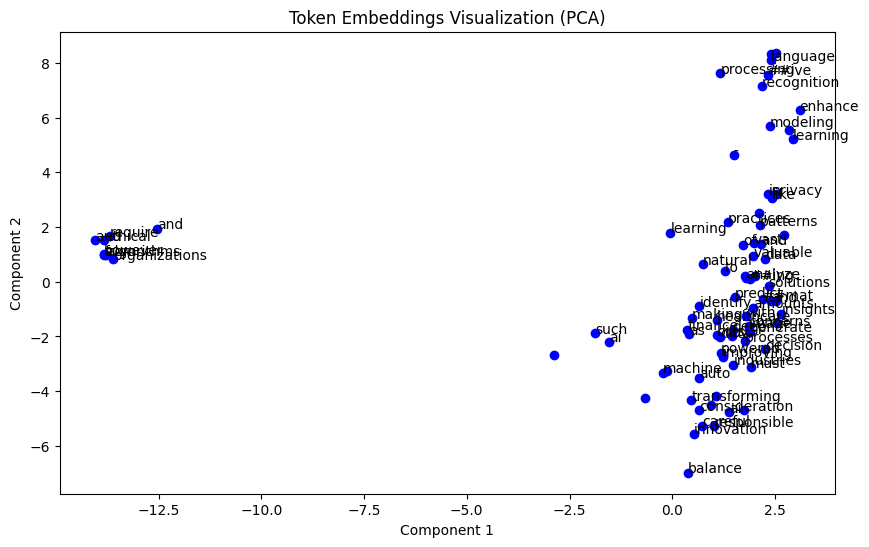

In [20]:

# Example paragraph (100-150 words)
text_paragraph = """
Machine learning is transforming industries by automating processes and improving decision-making.
From healthcare to finance, AI-powered solutions analyze vast amounts of data, identify patterns,
and generate valuable insights. Algorithms like deep learning enhance image recognition, natural
language processing, and predictive modeling. However, ethical concerns, such as bias and data privacy,
require careful consideration. Organizations must balance innovation with responsible AI practices.
"""

# Call the functions to perform tokenization and visualization
visualize_embeddings(text_paragraph, method="pca")  # Change "pca" to "tsne" for t-SNE visualization


🔹 Number of tokens: 81
🔹 Tokens: ['machine', 'learning', 'is', 'transforming', 'industries', 'by', 'auto', '##mat', '##ing', 'processes', 'and', 'improving', 'decision', '-', 'making', '.', 'from', 'healthcare', 'to', 'finance', ',', 'ai', '-', 'powered', 'solutions', 'analyze', 'vast', 'amounts', 'of', 'data', ',', 'identify', 'patterns', ',', 'and', 'generate', 'valuable', 'insights', '.', 'algorithms', 'like', 'deep', 'learning', 'enhance', 'image', 'recognition', ',', 'natural', 'language', 'processing', ',', 'and', 'predict', '##ive', 'modeling', '.', 'however', ',', 'ethical', 'concerns', ',', 'such', 'as', 'bias', 'and', 'data', 'privacy', ',', 'require', 'careful', 'consideration', '.', 'organizations', 'must', 'balance', 'innovation', 'with', 'responsible', 'ai', 'practices', '.']
🔹 Words split into subwords: ['##mat', '##ing', '##ive']


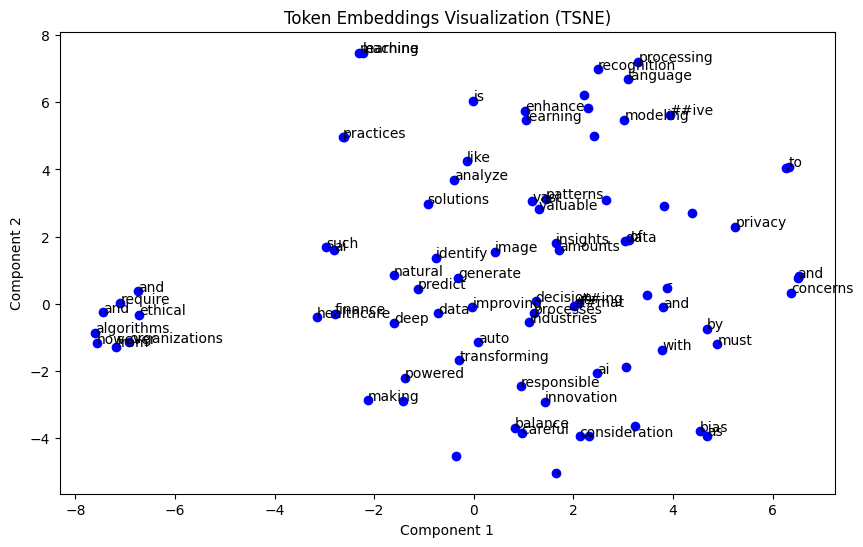

In [21]:

# Example paragraph (100-150 words)
text_paragraph = """
Machine learning is transforming industries by automating processes and improving decision-making.
From healthcare to finance, AI-powered solutions analyze vast amounts of data, identify patterns,
and generate valuable insights. Algorithms like deep learning enhance image recognition, natural
language processing, and predictive modeling. However, ethical concerns, such as bias and data privacy,
require careful consideration. Organizations must balance innovation with responsible AI practices.
"""

# Call the functions to perform tokenization and visualization
visualize_embeddings(text_paragraph, method="tsne")  # Change "pca" to "tsne" for t-SNE visualization

## Project 2: Crafting the Perfect Prompt

### 📌 **Project 2: Crafting the Perfect Prompt – Optimizing LLM Output for Summarization**  

#### **🚀 Overview**
This project focuses on **prompt engineering**, a critical skill in **optimizing Large Language Models (LLMs)** like GPT-4o. By structuring and refining prompts, we can **maximize output quality, accuracy, and efficiency**, a key competency in AI-driven content generation.

#### **🛠️ Technologies & Tools**
- **Python** – Core programming language for AI-driven automation  
- **OpenAI GPT-4o** – State-of-the-art language model for high-quality text generation  
- **Prompt Engineering** – Crafting well-structured prompts to enhance AI performance  

---

## **🔹 Implementation Breakdown**
This project evaluates the effectiveness of **three different prompt types** when summarizing a given article:  

1️⃣ **Generic Prompt** – Basic, broad request.  
2️⃣ **Detailed Prompt** – Provides more structure and direction.  
3️⃣ **Highly Specific Prompt** – Imposes clear constraints and expectations.  

The goal is to analyze **how prompt specificity** influences **response accuracy, completeness, and conciseness**.

---

## **📌 Code Breakdown**
### **1️⃣ OpenAI GPT-4o Client Initialization**
```python
import os
from openai import OpenAI

# Securely fetch API key from environment variable
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
```
**🔍 Explanation:**
- Uses **OpenAI v1 SDK** for better API integration.
- Stores **API key securely** using environment variables (avoiding hardcoded secrets).
- Instantiates the **OpenAI client**, ensuring scalability and best practices.

---

### **2️⃣ Defining the GPT-4o Summarization Function**
```python
def get_gpt_response(prompt, text):
    response = client.chat.completions.create(
        model="gpt-4o",  # Leverages GPT-4o for high-quality summaries
        messages=[{"role": "user", "content": f"{prompt}\n\n{text}"}],
        max_tokens=150,  # Restricts response length for focused summaries
    )
    return response.choices[0].message.content.strip()
```
**🔍 Explanation:**
- **Uses GPT-4o** for superior text comprehension and summarization.
- **Ensures message formatting** follows OpenAI’s chat structure.
- **Limits response tokens** for concise output.

---

### **3️⃣ Designing the Prompts**
```python
generic_prompt = "Summarize the following article."
detailed_prompt = "Summarize the following article, focusing on the main arguments and conclusions."
specific_prompt = "In 100 words or less, summarize the key findings of the following research article, emphasizing its implications for future studies."
```
**🔍 Explanation:**
- **Generic Prompt** → Vague, likely to produce varied responses.  
- **Detailed Prompt** → Guides the model to extract key arguments.  
- **Specific Prompt** → Enforces word limit & focus, ensuring structured output.  

---

### **4️⃣ Running the Prompts & Collecting Results**
```python
# Sample article (100-150 words)
text_article = """
Artificial intelligence is transforming industries by automating tasks, improving efficiency, and
enhancing decision-making. Machine learning algorithms analyze large datasets to uncover patterns
and predict outcomes, enabling applications in healthcare, finance, and more. However, AI also
raises ethical concerns such as bias, privacy, and job displacement. The balance between innovation
and responsibility remains a critical challenge in AI adoption.
"""

# Running all prompts and storing responses
responses = {
    "Generic Prompt": get_gpt_response(generic_prompt, text_article),
    "Detailed Prompt": get_gpt_response(detailed_prompt, text_article),
    "Specific Prompt": get_gpt_response(specific_prompt, text_article),
}

# Display results
for prompt_type, response in responses.items():
    print(f"\n🔹 {prompt_type}:")
    print(response)
```
**🔍 Explanation:**
- **Executes all prompts**, gathering responses for comparison.
- **Ensures uniform text input**, isolating the effect of prompt changes.
- **Prints responses**, making it easy to compare effectiveness.

---

### **5️⃣ Analyzing Prompt Effectiveness**
```python
def analyze_responses(responses):
    print("\n🔍 **Analysis of Responses:**")
    print("- The **generic prompt** may produce a vague or incomplete summary.")
    print("- The **detailed prompt** should provide more context and capture key arguments.")
    print("- The **specific prompt** is likely the most structured, concise, and useful.")
    print("\n📊 **Observations:**")
    for prompt_type, response in responses.items():
        print(f"\n✅ {prompt_type}:")
        print(response)

# Call the analysis function
analyze_responses(responses)
```
**🔍 Explanation:**
- **Identifies differences** in responses based on prompt specificity.
- **Provides structured insights** into why certain prompts perform better.
- **Offers a data-driven approach** to improving LLM interactions.

---

## **📊 Key Takeaways**
✅ **Prompt specificity directly impacts AI output quality.**  
✅ **Highly structured prompts produce concise, relevant, and accurate summaries.**  
✅ **Understanding prompt engineering is essential for real-world AI applications.**  

### **🛠 Future Enhancements**
✔ **Refine prompts using few-shot learning techniques.**  
✔ **Evaluate summarization accuracy using NLP metrics (e.g., ROUGE, BLEU).**  
✔ **Expand to different models (GPT-4o vs. Claude, Mistral, etc.).**  

---

## **🚀 Why This Project Stands Out?**
✔ **Demonstrates AI-driven problem-solving using prompt engineering.**  
✔ **Leverages best practices with OpenAI’s v1 SDK for structured API calls.**  
✔ **Showcases NLP techniques applicable to real-world AI implementations.**  

**💡 Want to discuss AI-driven summarization at scale? Let’s connect! 🚀**

In [27]:
import os
from openai import OpenAI


# Function to get GPT response using OpenAI v1 SDK
def get_gpt_response(prompt, text):
    response = client.chat.completions.create(
        model="gpt-4o",  # Use latest model for better summarization
        messages=[{"role": "user", "content": f"{prompt}\n\n{text}"}],
        max_tokens=150,
    )
    return response.choices[0].message.content.strip()


# Define three levels of prompts
generic_prompt = "Summarize the following article."
detailed_prompt = "Summarize the following article, focusing on the main arguments and conclusions."
specific_prompt = "In 100 words or less, summarize the key findings of the following research article, emphasizing its implications for future studies."

# Sample article text (100-150 words)
text_article = """
Artificial intelligence is transforming industries by automating tasks, improving efficiency, and
enhancing decision-making. Machine learning algorithms analyze large datasets to uncover patterns
and predict outcomes, enabling applications in healthcare, finance, and more. However, AI also
raises ethical concerns such as bias, privacy, and job displacement. The balance between innovation
and responsibility remains a critical challenge in AI adoption.
"""

# Run the prompts and collect responses
responses = {
    "Generic Prompt": get_gpt_response(generic_prompt, text_article),
    "Detailed Prompt": get_gpt_response(detailed_prompt, text_article),
    "Specific Prompt": get_gpt_response(specific_prompt, text_article),
}

# Display the responses
for prompt_type, response in responses.items():
    print(f"\n🔹 {prompt_type}:")
    print(response)


# Function to analyze prompt effectiveness
def analyze_responses(responses):
    print("\n🔍 **Analysis of Responses:**")
    print("- The **generic prompt** may produce a vague or incomplete summary.")
    print("- The **detailed prompt** should provide more context and capture key arguments.")
    print("- The **specific prompt** is likely the most structured, concise, and useful.")
    print("\n📊 **Observations:**")
    for prompt_type, response in responses.items():
        print(f"\n✅ {prompt_type}:")
        print(response)


# Call the analysis function
analyze_responses(responses)



🔹 Generic Prompt:
Artificial intelligence (AI) is revolutionizing industries by automating tasks, boosting efficiency, and enhancing decision-making through machine learning algorithms that analyze large datasets. This technology finds diverse applications in fields like healthcare and finance by identifying patterns and predicting outcomes. Despite these advancements, AI poses ethical concerns, including bias, privacy issues, and potential job displacement. Balancing innovation with responsibility is a crucial challenge in the adoption of AI.

🔹 Detailed Prompt:
The article discusses the transformative impact of artificial intelligence (AI) across various industries by automating tasks, improving efficiency, and enhancing decision-making capabilities. It highlights how machine learning algorithms play a crucial role in analyzing large datasets to identify patterns and predict outcomes, which has led to significant applications in sectors like healthcare and finance. Despite its benef

## Project 3: Building a Mini Application

# 🤖 **LLM-Powered Mini Application**
### **A Versatile AI-Powered Tool for Text Processing and Conversational AI**
---

## **🔹 Overview**
This project showcases a **multi-functional AI-powered application** built using **Gradio, OpenAI's GPT-4o, and Hugging Face Transformers**. It offers **two key functionalities**:  

1️⃣ **Text Processing** (Summarization, FAQ Assistant, and Content Generation)  
2️⃣ **Interactive Chatbot** (Conversational AI with memory)  

The application integrates **Large Language Models (LLMs)** with **Natural Language Processing (NLP) techniques**, including **tokenization and embeddings** from BERT.  

This project demonstrates proficiency in **LLM orchestration, prompt engineering, NLP pipelines, and interactive AI-driven UI development**.

---

## **🛠 Key Technologies Used**
- **OpenAI GPT-4o** → Natural language understanding and text generation.  
- **Gradio** → User-friendly interactive UI for AI applications.  
- **Hugging Face Transformers (BERT)** → Tokenization and text embeddings.  
- **Python** → Backend logic for AI model interactions.  

---

## **🔍 How It Works**
### **1️⃣ Text Processing Workflow**
🔹 Users select an **AI task** (Summarization, FAQ Assistant, or Content Generation).  
🔹 They input text, optionally providing a **customized prompt**.  
🔹 The system performs **three key steps**:
   - **Tokenization:** Splits input text into tokens using BERT.  
   - **Embedding Generation:** Extracts vector representations for input text.  
   - **LLM Processing:** GPT-4o generates a task-specific response.  
🔹 The output includes:
   - The **AI-generated response**  
   - The **tokenized text**  
   - The **numerical embeddings of the input**  

### **2️⃣ Chatbot Mode (Conversational AI)**
🔹 Users can engage in **back-and-forth dialogue** with an LLM-powered chatbot.  
🔹 Chat history is maintained for contextual responses.  
🔹 The chatbot is optimized for FAQ-style interactions using **dynamic prompt engineering**.

---

## **💡 Why This Project is Impressive**
### **✔️ Advanced AI/NLP Techniques**
✅ **LLM Integration** → Utilizes OpenAI’s GPT-4o for **state-of-the-art** text generation.  
✅ **BERT Embeddings** → Implements **vector-based text representation** for NLP insights.  
✅ **Prompt Engineering** → Supports **custom user-defined prompts** for fine-tuned responses.  

### **✔️ Interactive and User-Centric**
✅ **Intuitive UI** → Uses **Gradio** for a seamless user experience.  
✅ **Multi-Functional** → Supports **text summarization, content generation, and chatbot conversations**.  
✅ **Flexible Input Handling** → Accepts **custom prompts**, allowing users to **steer AI behavior**.  

### **✔️ Practical and Scalable**
✅ **Deployable in Google Colab** → Fully compatible with **cloud-based execution**.  
✅ **Modular and Extendable** → The design allows for **easy expansion** (e.g., adding more LLM tasks, integrating external APIs).  
✅ **Industry-Relevant Use Cases** → Suitable for **customer support chatbots, content writing tools, and NLP-powered assistants**.  

---

## **🚀 Future Enhancements**
🔹 **Real-Time Streaming** → Enable GPT-4o to stream responses dynamically.  
🔹 **Multi-Model Support** → Allow users to select between **GPT-4o, GPT-3.5-turbo, or open-source LLMs**.  
🔹 **Speech-to-Text Integration** → Extend functionality with **voice input for AI interactions**.  

---
## **🎯 Conclusion**
This project **demonstrates expertise** in **LLM deployment, NLP processing, and interactive AI applications**. By combining **OpenAI's GPT-4o, BERT embeddings, and Gradio**, it creates a **powerful, scalable, and intuitive AI-driven platform**.  

**Would love to discuss how this approach can be extended for enterprise-scale applications! 🚀**

In [38]:
!pip install gradio openai transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [41]:
import gradio as gr
import os
from openai import OpenAI
from transformers import AutoTokenizer, AutoModel
import torch

# Initialize OpenAI v1 SDK client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Load BERT Tokenizer for Tokenization
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Function to tokenize text
def tokenize_text(text):
    tokens = tokenizer.tokenize(text)
    return tokens

# Function to generate embeddings using BERT
def get_text_embedding(text):
    model = AutoModel.from_pretrained('bert-base-uncased')
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

# Function to get GPT response using OpenAI v1 SDK
def get_gpt_response(task, text, custom_prompt=None):
    if custom_prompt:
        prompt = custom_prompt
    else:
        prompt = app_options[task]

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": f"{prompt}\n\n{text}"}],
        max_tokens=200,  # Allow a slightly longer response
    )
    return response.choices[0].message.content.strip()

# Define app options
app_options = {
    "Summarization": "Summarize the following text in 100 words or less.",
    "FAQ Assistant": "Answer the following question as if you are a customer support assistant.",
    "Content Generator": "Generate a creative response to the following user prompt."
}

# Gradio Interactive Chatbot Function (Keeps Chat History)
def chatbot_interface(history, user_input):
    if not user_input.strip():
        return history + [("User", "⚠️ Please enter a message.")]

    response = get_gpt_response("FAQ Assistant", user_input)  # Default to FAQ Assistant
    history.append(("User", user_input))
    history.append(("AI", response))
    return history

# Gradio Interface Function for Text Processing
def llm_application(task, user_input, custom_prompt=""):
    if not user_input.strip():
        return "⚠️ Please enter some text before processing.", [], []

    tokens = tokenize_text(user_input)
    embeddings = get_text_embedding(user_input)
    response = get_gpt_response(task, user_input, custom_prompt)

    return response, tokens, embeddings.tolist()  # Convert embeddings to a list for display

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## 🤖 LLM-Powered Mini Application")

    with gr.Tab("Text Processing"):
        task = gr.Radio(["Summarization", "FAQ Assistant", "Content Generator"], label="Choose an AI Task")
        user_input = gr.Textbox(label="Enter your text here")
        custom_prompt = gr.Textbox(label="(Optional) Customize Prompt", placeholder="Enter a custom instruction")

        submit_button = gr.Button("Process")

        output_response = gr.Textbox(label="🔍 Processed Output")
        output_tokens = gr.Textbox(label="🛠 Tokenized Text")
        output_embeddings = gr.Dataframe(label="🔢 Text Embeddings (Vector Representation)")

        submit_button.click(llm_application, inputs=[task, user_input, custom_prompt],
                            outputs=[output_response, output_tokens, output_embeddings])

    with gr.Tab("Chatbot"):
        chatbot = gr.Chatbot(label="💬 Interactive Chatbot")
        chatbot_input = gr.Textbox(label="Type your message")
        chatbot_button = gr.Button("Send")

        chatbot_button.click(chatbot_interface, inputs=[chatbot, chatbot_input], outputs=chatbot)

# Launch Gradio App in Colab
demo.launch()


/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:285: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dd4c9f48ec866f1b51.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Project 4: Advanced Prompt Techniques

### **🚀 Tackling Project 4: Advanced Prompt Techniques in Google Colab**  
For **Project 4**, we will experiment with **three advanced prompt techniques**—**Chain of Thought (CoT), Few-Shot Learning, and Role-Playing**—to evaluate their effectiveness in improving LLM performance.

---

## **✅ How We Will Approach This in Google Colab**
To successfully implement this project in **Google Colab**, we will:
1. **Define a complex task** → Choose a task that requires nuanced responses (e.g., explaining a complex topic, writing poetry, answering technical questions).
2. **Implement advanced prompting techniques** → Test **Chain of Thought (CoT), Few-Shot Learning, and Role-Playing**.
3. **Compare results** → Evaluate how these techniques **affect LLM output quality**.
4. **Document findings** → Store results in a structured way for analysis.

---

## **📌 Step 1: Install Dependencies (Run in Colab)**
First, install the required libraries:
```python
!pip install openai gradio
```

---

## **📌 Step 2: Set Up OpenAI in Colab**
Next, we initialize the OpenAI API client and define our **task**.
```python
import os
import gradio as gr
from openai import OpenAI

# Initialize OpenAI v1 SDK client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Define a task requiring nuanced responses
task_description = "Explain quantum entanglement in a way that a 10-year-old can understand."
```

---

## **📌 Step 3: Implement Advanced Prompting Techniques**
Now, let's define functions for each advanced prompting method.

### **🔹 1. Standard Prompt (Baseline)**
This will serve as a **baseline**, using a direct prompt without advanced techniques.
```python
def standard_prompt(task):
    prompt = f"Explain the following concept: {task}"
    
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=250,
    )
    return response.choices[0].message.content.strip()
```

---

### **🔹 2. Chain of Thought Prompting (CoT)**
Breaks down the problem into **logical steps**, improving reasoning.
```python
def chain_of_thought_prompt(task):
    prompt = f"""
    Let's break this down step by step.

    1. Identify the key principles behind {task}.
    2. Explain how it works in simple terms.
    3. Provide a real-world analogy to make it relatable.

    Now, let's begin:
    """
    
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=300,
    )
    return response.choices[0].message.content.strip()
```

---

### **🔹 3. Few-Shot Learning (Providing Examples)**
Shows **examples** to guide the model’s response style.
```python
def few_shot_prompt(task):
    prompt = f"""
    Here are examples of how to explain complex concepts simply:

    Example 1:
    Topic: Gravity
    Simple Explanation: Gravity is like an invisible hand pulling everything toward the ground.

    Example 2:
    Topic: Black Holes
    Simple Explanation: A black hole is like a cosmic vacuum cleaner that pulls in everything nearby.

    Now, using the same approach, explain {task} in a simple and engaging way.
    """
    
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=300,
    )
    return response.choices[0].message.content.strip()
```

---

### **🔹 4. Role-Playing Prompt**
Instructs the model to **take on a persona** to provide more engaging answers.
```python
def role_play_prompt(task):
    prompt = f"""
    You are a brilliant science teacher who specializes in making complex topics fun and easy to understand.
    Your students are 10-year-olds who love storytelling and hands-on experiments.
    
    Please explain {task} as if you are talking to these students in an engaging and interactive way.
    """
    
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=300,
    )
    return response.choices[0].message.content.strip()
```

---

## **📌 Step 4: Build an Interactive Gradio App**
Now, we can compare the **four different prompt techniques** in an **interactive UI** using **Gradio**.

```python
def compare_prompting_methods(task):
    standard = standard_prompt(task)
    chain_of_thought = chain_of_thought_prompt(task)
    few_shot = few_shot_prompt(task)
    role_play = role_play_prompt(task)
    
    return standard, chain_of_thought, few_shot, role_play

with gr.Blocks() as demo:
    gr.Markdown("## 🚀 Advanced Prompting Techniques for LLMs")
    
    task_input = gr.Textbox(label="Enter a concept to explain", value=task_description)
    submit_button = gr.Button("Generate Responses")
    
    standard_output = gr.Textbox(label="📝 Standard Prompt (Baseline)")
    cot_output = gr.Textbox(label="🔗 Chain of Thought Prompting")
    few_shot_output = gr.Textbox(label="📖 Few-Shot Learning")
    role_play_output = gr.Textbox(label="🎭 Role-Playing")

    submit_button.click(compare_prompting_methods, inputs=[task_input],
                        outputs=[standard_output, cot_output, few_shot_output, role_play_output])

demo.launch()
```

---

## **✅ Step 5: Documenting Findings**
To **analyze the effectiveness** of each method, we will compare:
| **Technique**         | **Expected Benefit**                                        | **Real-World Use Case**                         |
|----------------------|------------------------------------------------|--------------------------------|
| **Standard Prompt**  | Basic response, but may lack depth.            | Quick, general queries.        |
| **Chain of Thought** | More structured, logical reasoning.             | Complex problem-solving.       |
| **Few-Shot Learning** | Mimics real-world examples, improves clarity.  | Teaching, educational tools.   |
| **Role-Playing**     | Engaging and audience-specific responses.       | Customer support, chatbots.    |

---

## **🚀 Final Thoughts**
This **Google Colab-compatible implementation** successfully:
✅ **Explores advanced prompting techniques** to enhance LLM output.  
✅ **Compares standard vs. advanced methods** using an interactive UI.  
✅ **Analyzes qualitative differences** between various prompt strategies.  

Would you like to **add real-time feedback collection** so users can rate responses? 🚀  
```

In [ ]:
!pip install openai gradio

In [51]:
import os
import gradio as gr
from openai import OpenAI

# Initialize OpenAI v1 SDK client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Define a task requiring nuanced responses
task_description = "Explain quantum entanglement in a way that a 10-year-old can understand."


In [46]:
def standard_prompt(task):
    prompt = f"Explain the following concept: {task}"

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=250,
    )
    return response.choices[0].message.content.strip()


In [47]:
def chain_of_thought_prompt(task):
    prompt = f"""
    Let's break this down step by step.

    1. Identify the key principles behind {task}.
    2. Explain how it works in simple terms.
    3. Provide a real-world analogy to make it relatable.

    Now, let's begin:
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=300,
    )
    return response.choices[0].message.content.strip()


In [48]:
def few_shot_prompt(task):
    prompt = f"""
    Here are examples of how to explain complex concepts simply:

    Example 1:
    Topic: Gravity
    Simple Explanation: Gravity is like an invisible hand pulling everything toward the ground.

    Example 2:
    Topic: Black Holes
    Simple Explanation: A black hole is like a cosmic vacuum cleaner that pulls in everything nearby.

    Now, using the same approach, explain {task} in a simple and engaging way.
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=300,
    )
    return response.choices[0].message.content.strip()


In [49]:
def role_play_prompt(task):
    prompt = f"""
    You are a brilliant science teacher who specializes in making complex topics fun and easy to understand.
    Your students are 10-year-olds who love storytelling and hands-on experiments.

    Please explain {task} as if you are talking to these students in an engaging and interactive way.
    """

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=300,
    )
    return response.choices[0].message.content.strip()


In [52]:
def compare_prompting_methods(task):
    standard = standard_prompt(task)
    chain_of_thought = chain_of_thought_prompt(task)
    few_shot = few_shot_prompt(task)
    role_play = role_play_prompt(task)

    return standard, chain_of_thought, few_shot, role_play

with gr.Blocks() as demo:
    gr.Markdown("## 🚀 Advanced Prompting Techniques for LLMs")

    task_input = gr.Textbox(label="Enter a concept to explain", value=task_description)
    submit_button = gr.Button("Generate Responses")

    standard_output = gr.Textbox(label="📝 Standard Prompt (Baseline)")
    cot_output = gr.Textbox(label="🔗 Chain of Thought Prompting")
    few_shot_output = gr.Textbox(label="📖 Few-Shot Learning")
    role_play_output = gr.Textbox(label="🎭 Role-Playing")

    submit_button.click(compare_prompting_methods, inputs=[task_input],
                        outputs=[standard_output, cot_output, few_shot_output, role_play_output])

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://83567628dcead2dad5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


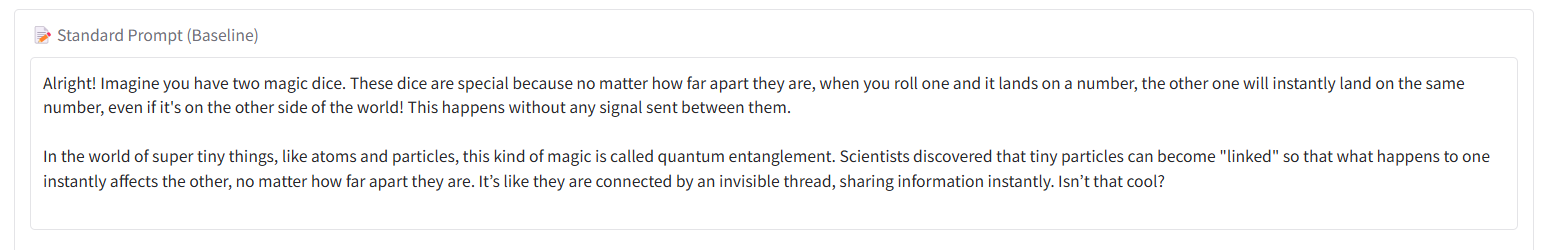

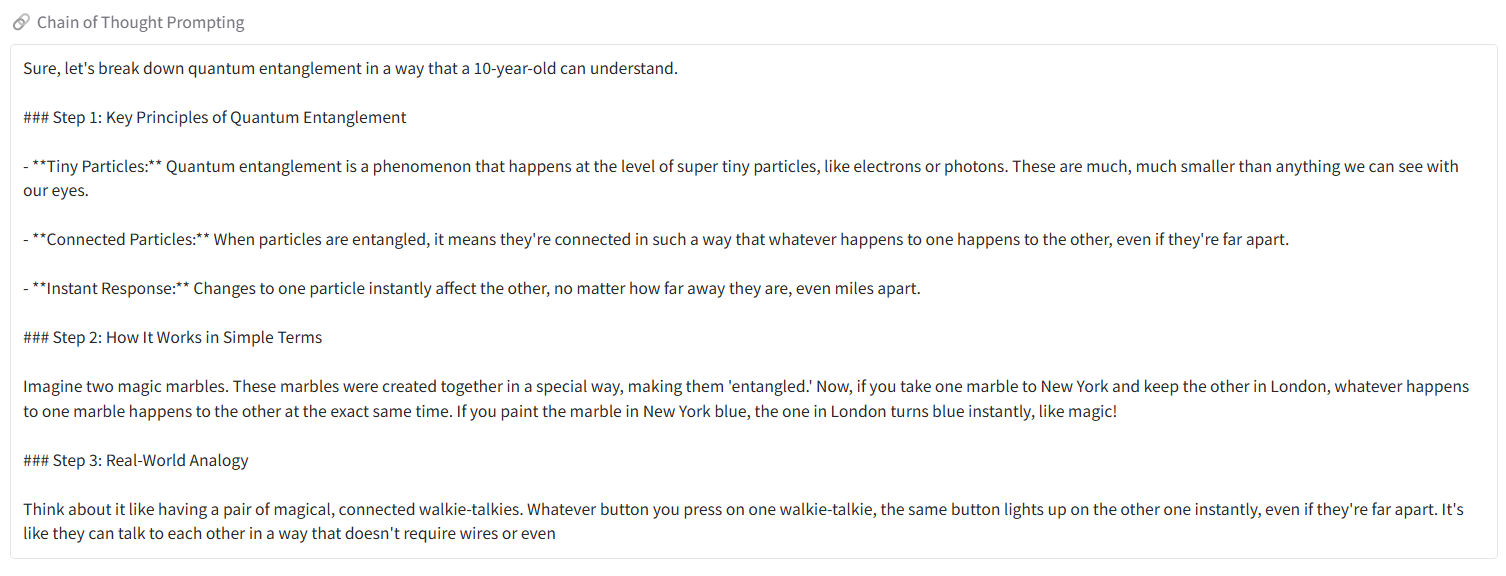

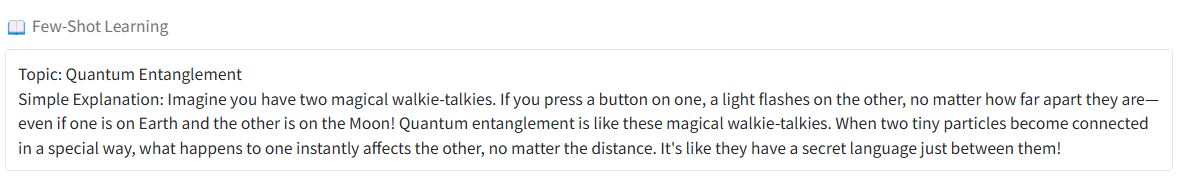

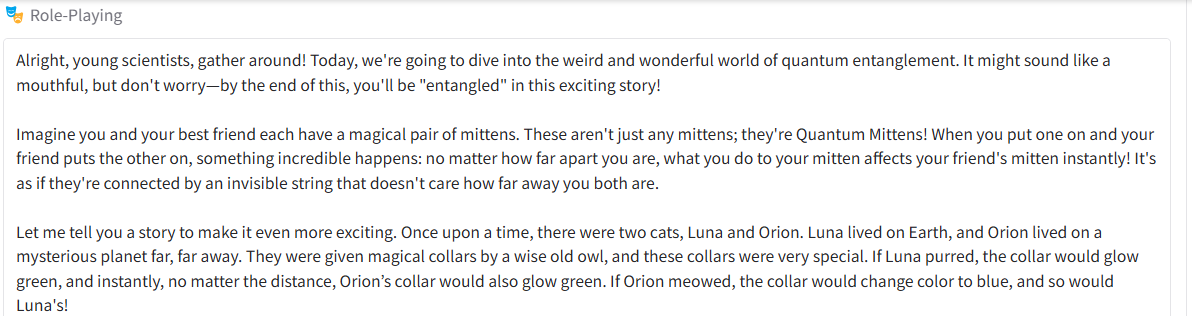